# Doing Bayesian Data Analysis

Simple example from __Chapter 16__.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

# Kruschke's light blue color
sns.set_palette(["#87ceeb"])
sns.set_context("talk")

In [2]:
y = [-2, -1, 0, 1, 2, 15]
print y

with pm.Model() as model:
    # Priors
    sigma_norm = pm.Uniform("sigma_norm", 0, 100)
    mu_norm = pm.Normal("mu_norm", mu=0, tau=1E-8)

    sigma_t = pm.Uniform("sigma_t", 0, 100)
    mu_t = pm.Normal("mu_t", mu=0, tau=1E-8)
    nu = pm.Exponential("nu", 1.0 / len(y))
    # Likelihood
    y_norm = pm.Normal("y_norm", mu=mu_norm, sd=sigma_norm, observed=y)
    y_t = pm.StudentT("y_t", nu=nu, mu=mu_t, sd=sigma_t, observed=y)
    # Sample
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step, start)
    
burn_in = 5000

[-2, -1, 0, 1, 2, 15]
Optimization terminated successfully.
         Current function value: 64.462793
         Iterations: 14
         Function evaluations: 21
         Gradient evaluations: 21


100%|██████████| 10000/10000 [00:04<00:00, 2256.32it/s]


In [3]:
pm.df_summary(trace[burn_in:])

,mean,sd,mc_error,hpd_2.5,hpd_97.5
mu_norm,2.818763,4.180788,0.137659,-5.196148,11.381943
mu_t,1.304838,3.178604,0.129005,-4.679158,7.700383
sigma_norm,8.809055,4.223494,0.192720,3.453768,17.606395
sigma_t,5.895666,4.524431,0.215006,0.497834,13.350355
nu,5.589781,5.561356,0.213400,0.216172,17.059820


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111262fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1159f66d0>]], dtype=object)

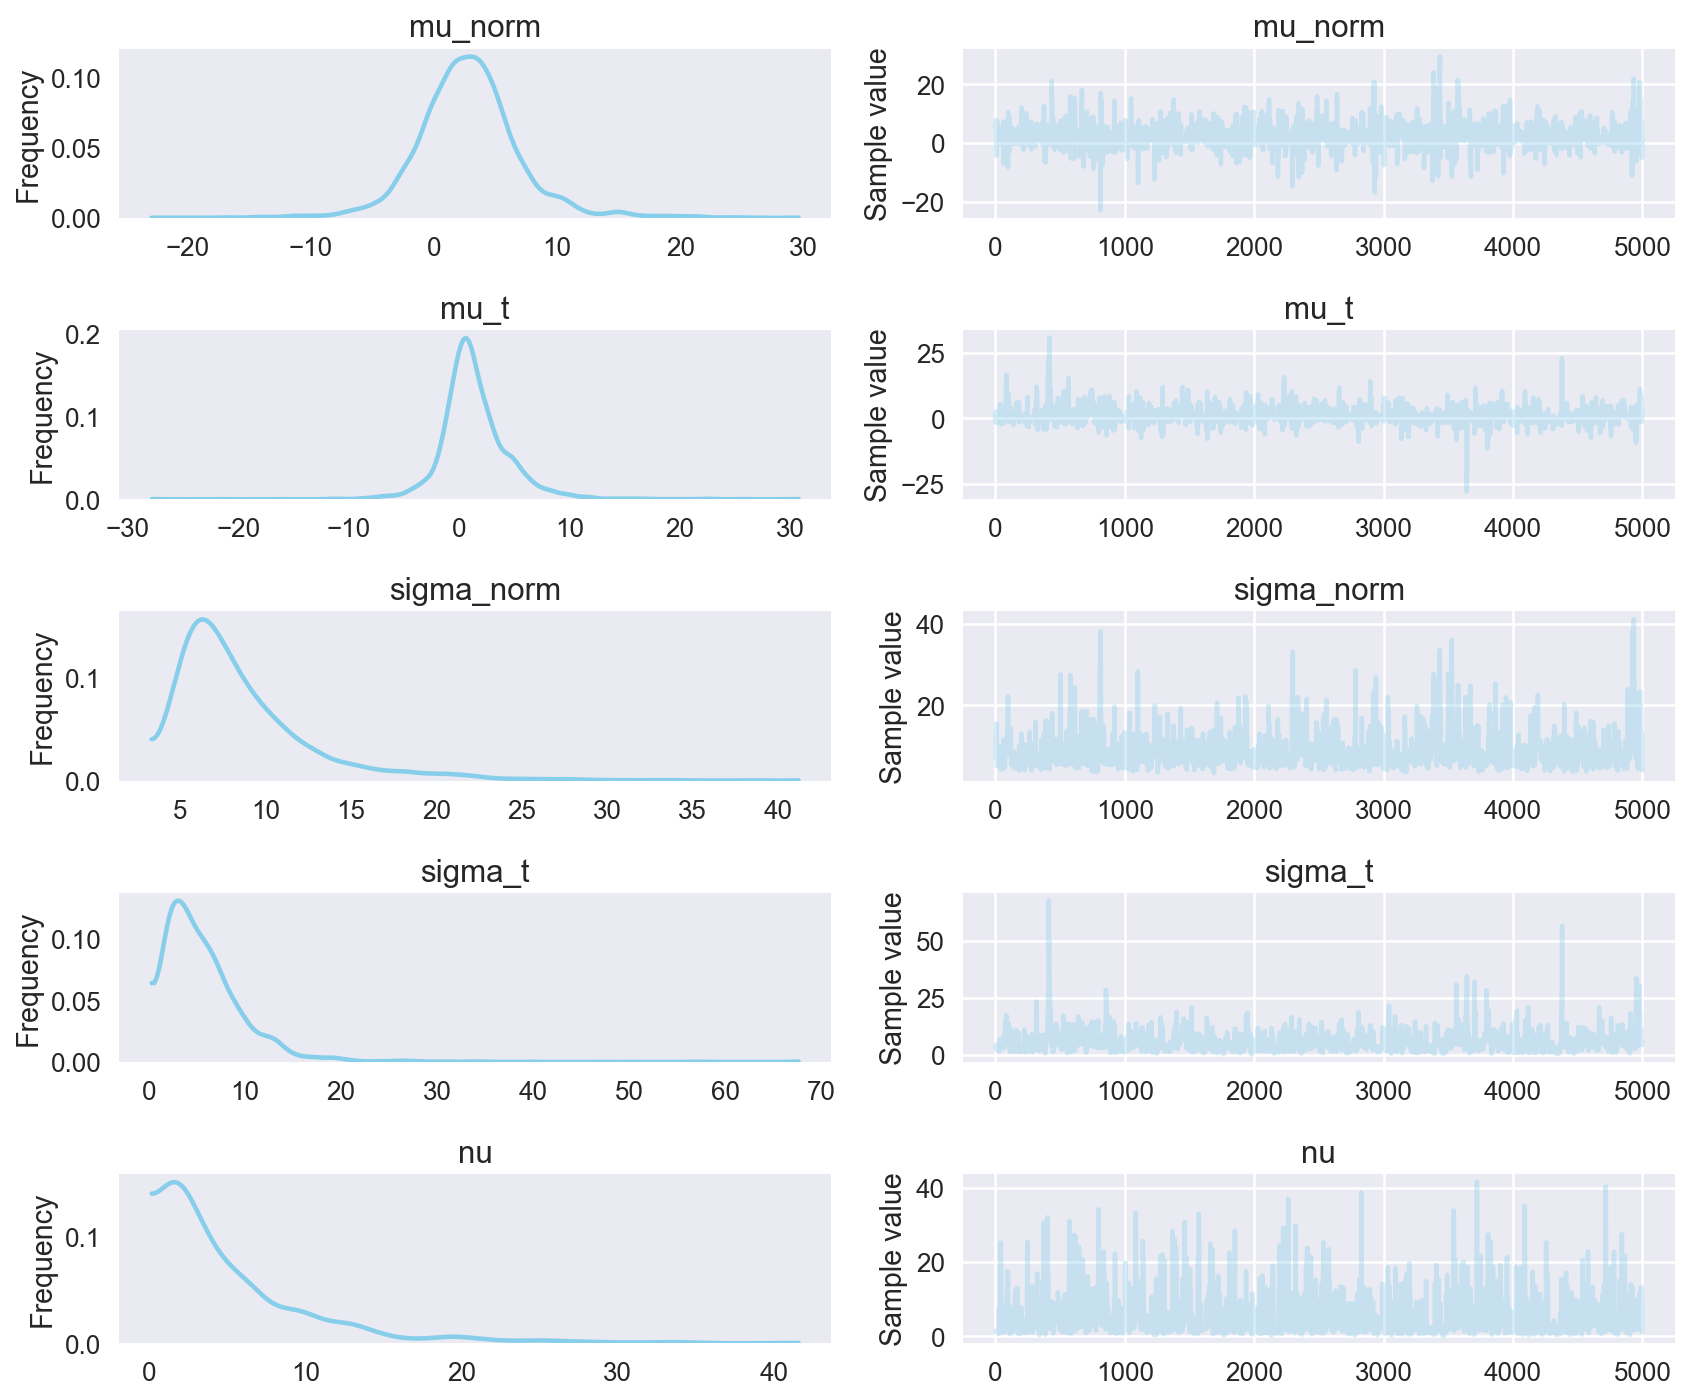

In [4]:
pm.traceplot(trace[burn_in:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115f61810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117641150>], dtype=object)

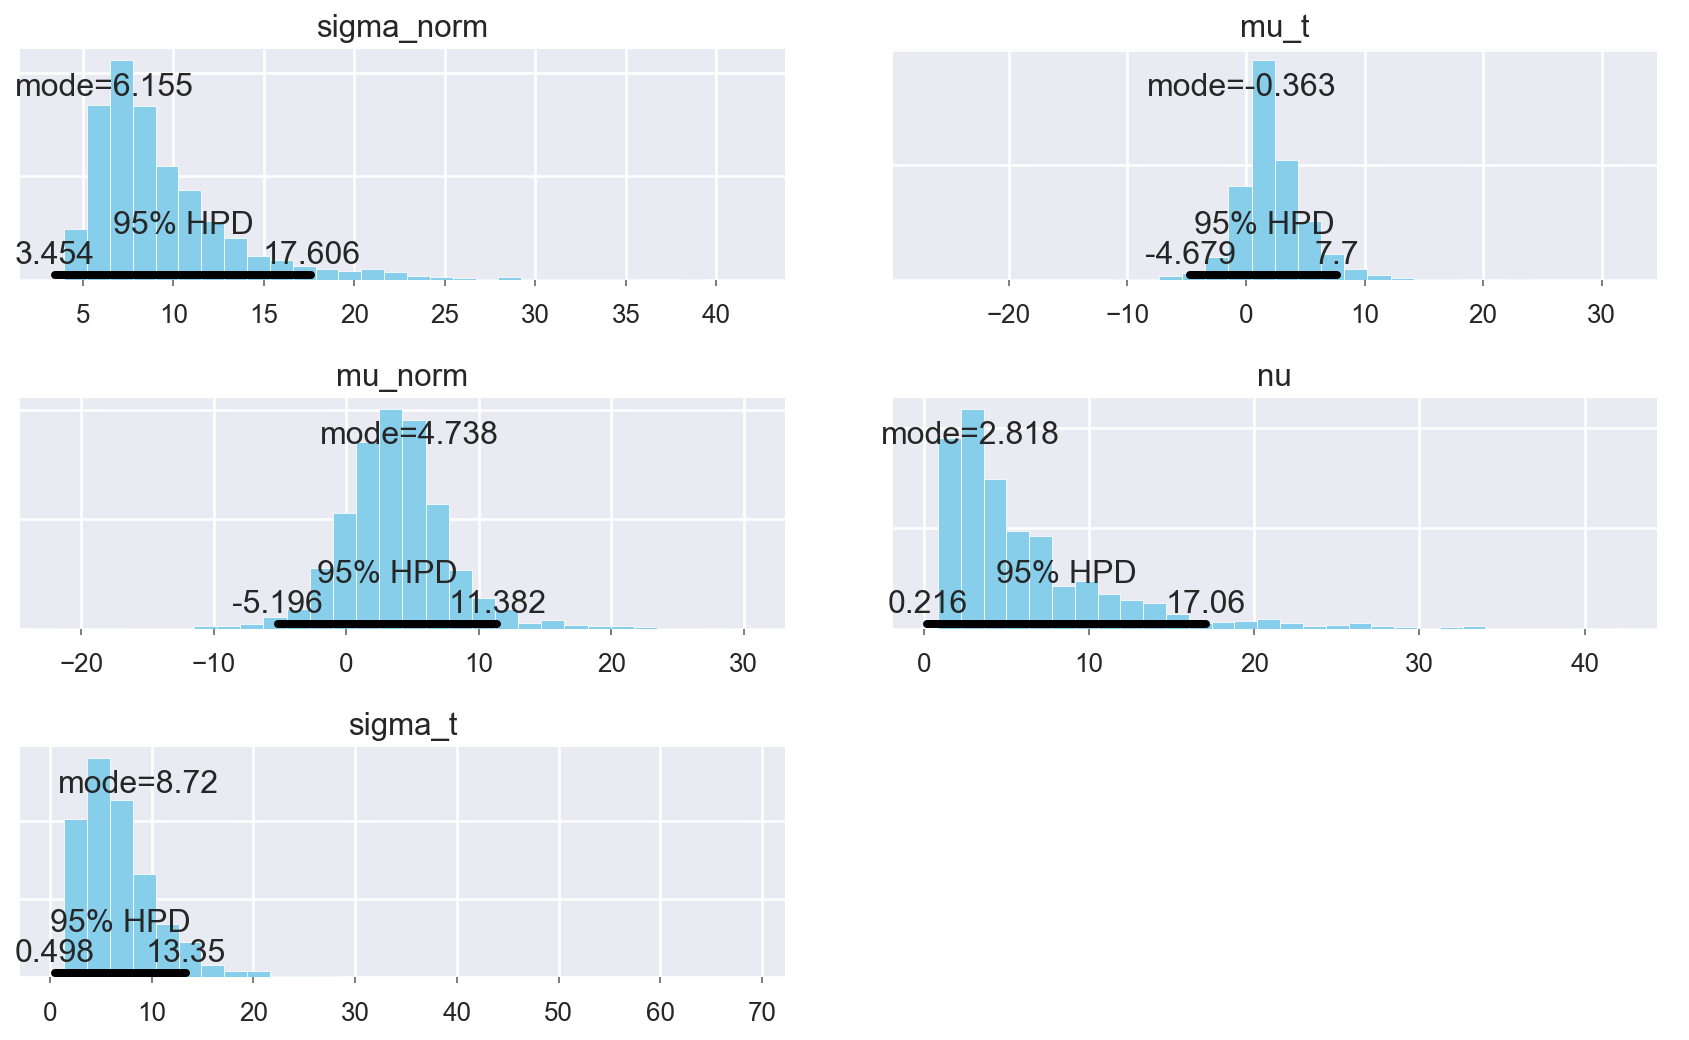

In [5]:
pm.plot_posterior(trace[burn_in:], point_estimate="mode")